## 多分类问题中的混淆矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484

In [7]:
y_predict = log_reg.predict(X_test)

In [8]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

报错：Target is multiclass，目标是个多分类问题。

在 precision_score 中还有一个 average 参数：
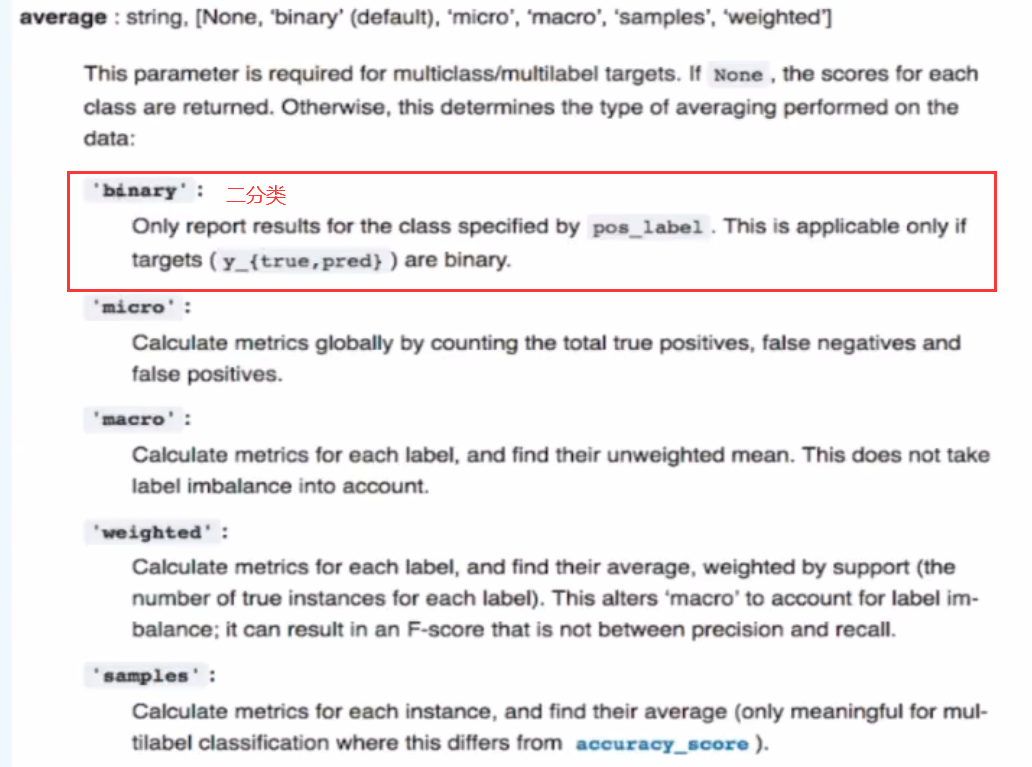

In [9]:
precision_score(y_test, y_predict, average="micro") # 多分类问题

0.93115438108484

## 多分类中的混淆矩阵

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]], dtype=int64)

为了更直观的看出，我们将混淆矩阵绘制出来

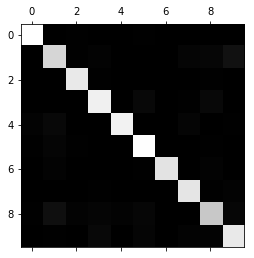

In [12]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)

上图中越亮的地方代表数值越大，越暗的地方数值越小

但是我们想看到是犯错的地方

In [14]:
row_sums = np.sum(cfm, axis=1) # 每一行有多少个样本
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0) # 将对角线的数字填成0
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

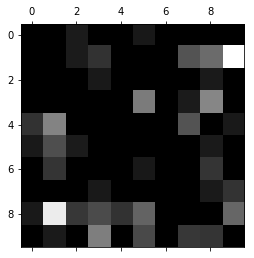

In [15]:
plt.matshow(err_matrix, cmap=plt.cm.gray)

越亮的地方表示犯错越多的地方。

比如在右上角有一个很亮的格子，表示我们把很多真值为 1 的样本预测成了 9
在左下角也有一个很亮的格子，表示我们把很多真值为 8 的样本预测成了 1

然后我们把得到的结果又规约成了一个二分类问题，换句话说，我们这个多分类的问题很容易混淆 1 和 9，也很容易混淆 8 和 1。那么相应的我们可以微调 1 和 9 或者 1 和 8 之间的 threshold 的值，来提高多分类问题的准确度。